## Dependencies

In [1]:
pip list 

Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- ---------------------
absl-py                       1.3.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.4.1
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall  

In [2]:
!pip install opencv-python matplotlib gdown tensorflow

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfds-nightly 4.9.3.dev202310060044 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-datasets 4.9.3 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.


In [3]:
import os 
import cv2
import imageio
import tensorflow as tf
import numpy as np 
from typing import List
from matplotlib import pyplot as plt 


In [4]:
# Preventing exponential memory growth 

physical_devices =  tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

## Build Data Loading functions
+ gdown is a Python library that allows you to easily download files from Google Drive, even if they are large or require bypassing security warnings. It offers a simple and straightforward interface for both command-line and programmatic use.

In [5]:
import gdown

In [6]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip' ## data will be downloaded in zip format 
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=015b68d5-d1c5-4b2e-a363-e583b5dd18a7
To: C:\Users\Windows 10 Pro\Desktop\personal-projects\DL projects\data.zip
100%|██████████| 423M/423M [01:23<00:00, 5.08MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [26]:
# writing a function for data loading 

def load_video(path:str) -> List[float]:
    
#     Video capture instance which takes path 
    cap = cv2.VideoCapture(path)
    frames = []
#     Looping through the path, converting to intger, and then storing into frmaes[empty array]
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret,frame = cap.read()
#         Converting the frame to grayscale image
        frame = tf.image.rgb_to_grayscale(frame)
#     Isolating the mouth part by slicing out only the mouth portion.
        frames.append(frame[190:236,80:220,:])
    cap.release()
#     scaling and standardising the frames with the mean and standard diviation
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames,tf.float32))
    return tf.cast((frames - mean ), tf.float32) / std

### Tokenizing with StringLookup API from keras

<i>StringLookup encoding refers to a technique used in various machine learning applications to convert strings into numerical representations. This is often used as a pre-processing step before feeding textual data into models, allowing them to work more effectively with numeric data.

* https://keras.io/api/layers/preprocessing_layers/categorical/string_lookup/

In [16]:
# character that might be encountered within the anotation of the data, then storing as a list 
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789"]

In [17]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [18]:
# Characters to number
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="") # oov means if it encounters a value it doesn't recognise, it shoul leave it empty

# Numbers to character
num_to_char = tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True)

print("The vocabuary is {}".format(char_to_num.get_vocabulary()))
print("Size {}".format(char_to_num.vocabulary_size()))


The vocabuary is ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Size 39


In [19]:
char_to_num(['o','l','a','t','u','d','e'])

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([15, 12,  1, 20, 21,  4,  5], dtype=int64)>

In [20]:
num_to_char([15, 12,  1, 20, 21,  4,  5]) # retruns a bite encoded value 

<tf.Tensor: shape=(7,), dtype=string, numpy=array([b'o', b'l', b'a', b't', b'u', b'd', b'e'], dtype=object)>

In [22]:
# Function to load up the alignment

def load_alignment(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    token = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*token, '', line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [27]:
# Load data function 

def load_data(path:str):
    path = bytes.decode(path.numpy())
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1', f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignment(alignment_path)
    
    return frames, alignments

In [30]:
test_path = 'bbal6n.align'

In [31]:
load_data(tf.convert_to_tensor(test_path))

(<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
 array([[[[ 1.4603739 ],
          [ 1.4603739 ],
          [ 1.4209043 ],
          ...,
          [ 0.15787826],
          [ 0.19734782],
          [ 0.07893913]],
 
         [[ 1.4603739 ],
          [ 1.4603739 ],
          [ 1.4209043 ],
          ...,
          [ 0.15787826],
          [ 0.07893913],
          [ 0.03946957]],
 
         [[ 1.4209043 ],
          [ 1.4209043 ],
          [ 1.3814348 ],
          ...,
          [ 0.07893913],
          [ 0.07893913],
          [ 0.07893913]],
 
         ...,
 
         [[ 0.94726956],
          [ 0.94726956],
          [ 0.94726956],
          ...,
          [ 9.94633   ],
          [ 9.867392  ],
          [ 9.867392  ]],
 
         [[ 0.94726956],
          [ 0.94726956],
          [ 0.94726956],
          ...,
          [ 9.90686   ],
          [ 9.867392  ],
          [ 9.867392  ]],
 
         [[ 0.94726956],
          [ 0.94726956],
          [ 0.94726956],
          

In [41]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [42]:
len(frames)

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.4603739 ],
         [ 1.4603739 ],
         [ 1.4209043 ],
         ...,
         [ 0.15787826],
         [ 0.19734782],
         [ 0.07893913]],

        [[ 1.4603739 ],
         [ 1.4603739 ],
         [ 1.4209043 ],
         ...,
         [ 0.15787826],
         [ 0.07893913],
         [ 0.03946957]],

        [[ 1.4209043 ],
         [ 1.4209043 ],
         [ 1.3814348 ],
         ...,
         [ 0.07893913],
         [ 0.07893913],
         [ 0.07893913]],

        ...,

        [[ 0.94726956],
         [ 0.94726956],
         [ 0.94726956],
         ...,
         [ 9.94633   ],
         [ 9.867392  ],
         [ 9.867392  ]],

        [[ 0.94726956],
         [ 0.94726956],
         [ 0.94726956],
         ...,
         [ 9.90686   ],
         [ 9.867392  ],
         [ 9.867392  ]],

        [[ 0.94726956],
         [ 0.94726956],
         [ 0.94726956],
         ...,
         [ 9.90686   ],
         [ 9.86739

In [65]:
len(frames)

75

In [66]:
len(alignments)

2

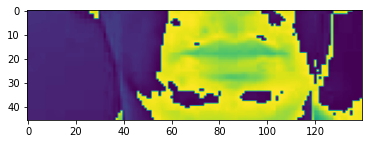

In [43]:
plt.imshow(frames[0]) ## you can see the mouth portion of the face 

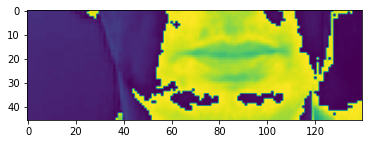

In [44]:
plt.imshow(frames[3])

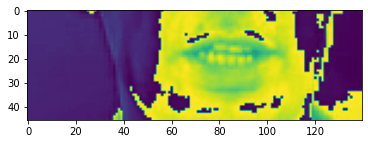

In [45]:
plt.imshow(frames[40])

In [47]:
# Mapping the functions

def mappable_function(path:str) -> List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result 

###  Creating Data Pipeline

In [67]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg') # looks for anything with mpg in the dataset 
data = data.shuffle(500) ## shuffling 
data = data.map(mappable_function) # wrapping into the mappable function above
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40])) # converting into a padded batch in 75 frames for each video
data = data.prefetch(tf.data.AUTOTUNE) # optimisation with prefetch

In [69]:
frames, alignments = data.as_numpy_iterator().next()

In [72]:
len(frames)

2

In [73]:
len(alignments)

2

In [70]:
test = data.as_numpy_iterator()

In [71]:
val = test.next(); val[0]

array([[[[[ 1.4416378 ],
          [ 1.4416378 ],
          [ 1.4828274 ],
          ...,
          [ 0.0823793 ],
          [ 0.0823793 ],
          [ 0.0823793 ]],

         [[ 1.4416378 ],
          [ 1.4416378 ],
          [ 1.4828274 ],
          ...,
          [ 0.0823793 ],
          [ 0.0823793 ],
          [ 0.0823793 ]],

         [[ 1.4004482 ],
          [ 1.4004482 ],
          [ 1.4004482 ],
          ...,
          [ 0.        ],
          [ 0.        ],
          [ 0.        ]],

         ...,

         [[ 0.947362  ],
          [ 0.947362  ],
          [ 0.947362  ],
          ...,
          [10.215034  ],
          [10.215034  ],
          [10.215034  ]],

         [[ 0.947362  ],
          [ 0.947362  ],
          [ 0.947362  ],
          ...,
          [10.215034  ],
          [10.215034  ],
          [10.215034  ]],

         [[ 0.947362  ],
          [ 0.947362  ],
          [ 0.947362  ],
          ...,
          [10.215034  ],
          [10.215034  ],
          

In [74]:
# converting anumpy arrayy to a GIF 

imageio.mimsave('./animation.gif', val[0][1], fps=10)

Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.506919860839844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

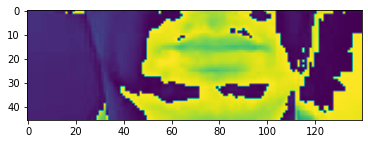

In [75]:
# [0]:videos,[0] 1st video from batch, [0] the first frame in the video
plt.imshow(val[0][0][0])

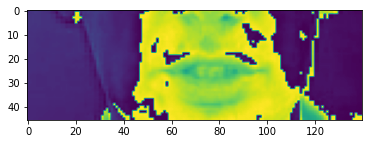

In [76]:
# [0] get videos, [1] 1st video from batch, [35] the first frame in the video
plt.imshow(val[0][1][35])

In [77]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'lease'>

## Deep Neural Network

In [78]:
import os 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [79]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [81]:
#  Neural Net Model


# Instantiation of the model
model = Sequential()

# Adding convolution 
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

# Flattening 
model.add(TimeDistributed(Flatten()))


# passing bidirectional shape from left to right 
model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))


model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

# Dense layer
model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                  

In [83]:
# Testing 

yhat = model.predict(val[0])

1/1 [==============================] - 6s 6s/step


In [84]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[1]])

<tf.Tensor: shape=(), dtype=string, numpy=b"z99''''''''''''''zzzz'''''''''''zzzzzzzzzzzzzzzzzzzzzzzzzssssssssssssssssss">

In [85]:
model.input_shape

(None, 75, 46, 140, 1)

In [86]:
model.output_shape

(None, 75, 40)

#### future Reference 

+ https://www.youtube.com/watch?v=uKyojQjbx4c&t=547s
